In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import time
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/31_DM/30_homeWork3/Dry_Bean_Dataset.xlsx')

x: pd.DataFrame = df.iloc()[:, :-1]
x


scaler = MinMaxScaler()
x_nol = scaler.fit_transform(x)

# hierarchical  fit


In [ ]:
k_stat = time.time()
hierarchical = AgglomerativeClustering(n_clusters=7,compute_distances=True)
hierarchical_lable = hierarchical.fit_predict(x_nol)
k_end = time.time() - k_stat
print(f'using time is {k_end*1000:.6f} ms ')

using time is 10915.345192 ms 


In [ ]:
hierarchical_lable

array([1, 3, 1, ..., 1, 2, 2])

In [ ]:
df['hierarchical_lable'] = hierarchical_lable

df_hierarchical = df.pivot_table(index=['hierarchical_lable'],
                     columns=['Class'],
                     values=['Area'],
                     aggfunc="count")

df_hierarchical.columns = df['Class'].value_counts().index
df_hierarchical = df_hierarchical.fillna(value=0)
df_hierarchical

,DERMASON,SIRA,SEKER,HOROZ,CALI,BARBUNYA,BOMBAY
hierarchical_lable,,,,,,,
0,8.0,0.0,46.0,5.0,1792.0,0.0,29.0
1,24.0,0.0,6.0,3379.0,12.0,153.0,1095.0
2,22.0,0.0,27.0,101.0,90.0,24.0,1470.0
3,4.0,0.0,2.0,61.0,0.0,1845.0,25.0
4,719.0,0.0,1543.0,0.0,34.0,1.0,12.0
5,0.0,521.0,0.0,0.0,0.0,0.0,0.0
6,545.0,1.0,6.0,0.0,0.0,4.0,5.0


# purity

In [ ]:
def get_purity(df: pd.DataFrame):
    temp = df / df.sum()
    purity = temp.max()
    return purity


df_hierarchical['purity'] = df_hierarchical.apply(get_purity, axis=1)
df_hierarchical['purity_weight'] = (df_hierarchical['purity'] * (df_hierarchical.iloc()[:, :-1].sum(axis=1) / df_hierarchical.iloc()[:, :-1].sum(axis=1).sum()))
hierarchical_total_purity = df_hierarchical['purity_weight'].sum()
print(f'total purity for hierarchical is {hierarchical_total_purity:.6f}')
df_hierarchical

total purity for hierarchical is 0.814733


,DERMASON,SIRA,SEKER,HOROZ,CALI,BARBUNYA,BOMBAY,purity,purity_weight
hierarchical_lable,,,,,,,,,
0,8.0,0.0,46.0,5.0,1792.0,0.0,29.0,0.952642,0.131590
1,24.0,0.0,6.0,3379.0,12.0,153.0,1095.0,0.723559,0.248130
2,22.0,0.0,27.0,101.0,90.0,24.0,1470.0,0.847284,0.107946
3,4.0,0.0,2.0,61.0,0.0,1845.0,25.0,0.951969,0.135482
4,719.0,0.0,1543.0,0.0,34.0,1.0,12.0,0.668029,0.113308
5,0.0,521.0,0.0,0.0,0.0,0.0,0.0,0.998011,0.038258
6,545.0,1.0,6.0,0.0,0.0,4.0,5.0,0.969731,0.040020


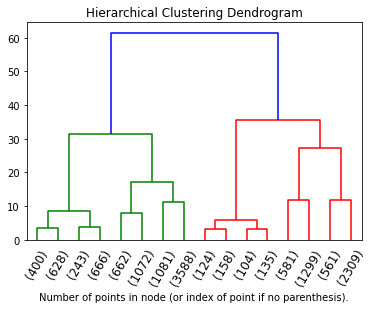

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hierarchical, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.xticks(rotation=60)
plt.show()

In [ ]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,hierarchical_lable
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,1
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,3
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,1
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,3
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON,2
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON,1
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON,1
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON,2


In [ ]:
total_purity_list=[]

for i in range(3,30,1):
  df1=df.iloc()[:,:-1].copy()
  temp = AgglomerativeClustering(n_clusters=i,compute_distances=True)
  temp_lable = temp.fit_predict(x_nol)
  df1['hierarchical_lable'] = temp_lable

  df_temp = df1.pivot_table(index=['hierarchical_lable'],
                      columns=['Class'],
                      values=['Area'],
                      aggfunc="count")

  df_temp.columns = df1['Class'].value_counts().index
  df_temp = df_temp.fillna(value=0)

  df_temp['purity'] = df_temp.apply(get_purity, axis=1)
  df_temp['purity_weight'] = (df_temp['purity'] * (df_temp.iloc()[:, :-1].sum(axis=1) / df_temp.iloc()[:, :-1].sum(axis=1).sum()))
  hierarchical_total_purity = df_temp['purity_weight'].sum()
  total_purity_list.append(hierarchical_total_purity)


In [ ]:
df_temp=pd.DataFrame(total_purity_list,index=range(3,30,1))
df_temp

,0
3,0.432591
4,0.563662
5,0.674969
6,0.775549
7,0.815150
8,0.815150
9,0.815150
10,0.834472
11,0.834472
12,0.834472


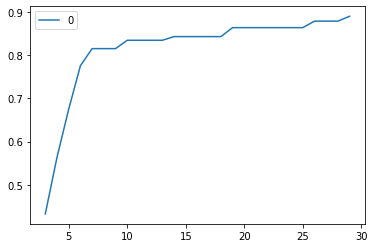

In [ ]:
df_temp.plot()